In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico ['availability_365'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
26582 non-null  int64
dtypes: int64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico ['availability_365'].max()
Min = Mexico ['availability_365'].min()
Limites = [Min, Max]
Limites

[0, 365]

In [6]:
# Calculamos el rango R
R = Max - Min
R

365

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

23.263772090193346

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (0, 365, 16)
intervalos

array([  0.        ,  24.33333333,  48.66666667,  73.        ,
        97.33333333, 121.66666667, 146.        , 170.33333333,
       194.66666667, 219.        , 243.33333333, 267.66666667,
       292.        , 316.33333333, 340.66666667, 365.        ])

In [10]:
# Creamos las categorías
categorias = [
    "Sin disponibilidad",          
    "Ocasionalmente disponible", 
    "Disponible algunos días",    
    "Disponible con frecuencia",  
    "Disponible moderadamente",  
    "Disponible regularmente",    
    "Disponible la mitad del año",
    "Alta disponibilidad parcial",
    "Disponibilidad frecuente",   
    "Muy disponible",             
    "Disponible la mayor parte",  
    "Casi siempre disponible",    
    "Disponible casi todo el año",
    "Disponible todo el año",    
    "Máxima disponibilidad"       
]

In [11]:
# Creamos las ctegorias en la columna numerica
Mexico ['availability_365'] = pd.cut ( x = Mexico  ['availability_365'], bins = intervalos, labels = categorias )
Mexico ['availability_365']

0              Máxima disponibilidad
1             Disponible todo el año
2             Disponible todo el año
3          Disponible la mayor parte
4            Casi siempre disponible
                    ...             
26577          Máxima disponibilidad
26578    Alta disponibilidad parcial
26579    Alta disponibilidad parcial
26580    Alta disponibilidad parcial
26581    Disponible la mitad del año
Name: availability_365, Length: 26582, dtype: category
Categories (15, object): ['Sin disponibilidad' < 'Ocasionalmente disponible' < 'Disponible algunos días' < 'Disponible con frecuencia' ... 'Casi siempre disponible' < 'Disponible casi todo el año' < 'Disponible todo el año' < 'Máxima disponibilidad']

In [12]:
table1 = freq_tbl(Mexico ['availability_365'])
table1

,availability_365,frequency,percentage,cumulative_perc
0,Máxima disponibilidad,6605,0.248476,0.272686
1,Disponible todo el año,2815,0.105899,0.388903
2,Disponible la mayor parte,1977,0.074374,0.470523
3,Disponible con frecuencia,1692,0.063652,0.540377
4,Casi siempre disponible,1570,0.059063,0.605194
5,Disponible casi todo el año,1436,0.054022,0.664479
6,Disponible algunos días,1236,0.046498,0.715507
7,Disponible la mitad del año,1122,0.042209,0.761828
8,Alta disponibilidad parcial,1089,0.040968,0.806787
9,Muy disponible,1052,0.039576,0.850219


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,availability_365,frequency
0,Máxima disponibilidad,6605
1,Disponible todo el año,2815
2,Disponible la mayor parte,1977
3,Disponible con frecuencia,1692
4,Casi siempre disponible,1570
5,Disponible casi todo el año,1436
6,Disponible algunos días,1236
7,Disponible la mitad del año,1122
8,Alta disponibilidad parcial,1089
9,Muy disponible,1052


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('availability_365')
Filtro_index

,frequency
availability_365,
Máxima disponibilidad,6605
Disponible todo el año,2815
Disponible la mayor parte,1977
Disponible con frecuencia,1692
Casi siempre disponible,1570
Disponible casi todo el año,1436
Disponible algunos días,1236
Disponible la mitad del año,1122
Alta disponibilidad parcial,1089


Text(0, 0.5, 'Frecuencia')

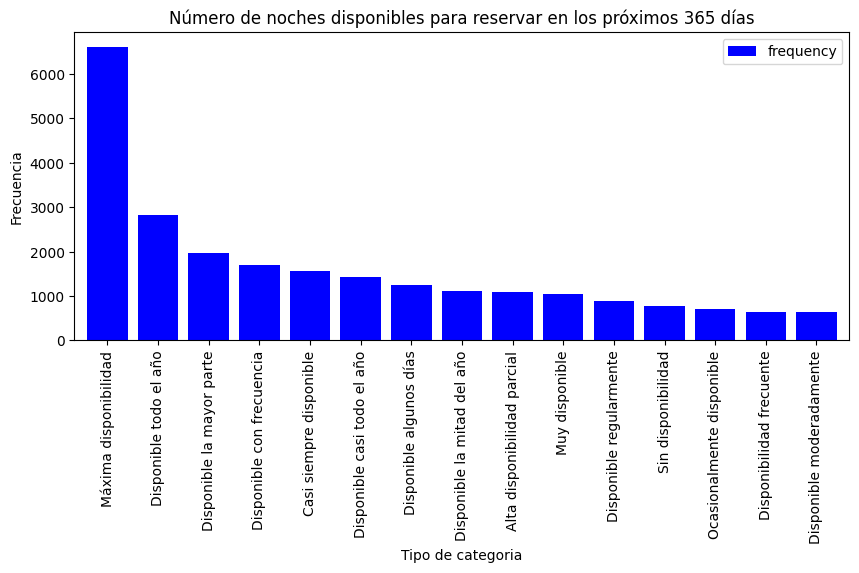

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Número de noches disponibles para reservar en los próximos 365 días')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')